In [25]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [26]:
%reset
import importlib
from rocketpy import *

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

#### Motor Setup


Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns

Plots


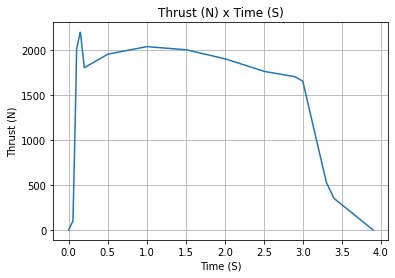

In [27]:

Pro75M1670 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

Pro75M1670.info()


#### Rocket Setup

In [28]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="data/calisto/powerOffDragCurve.csv",
    powerOnDrag="data/calisto/powerOnDragCurve.csv",
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

#### Flight Data

733.3452197470751
734.0168651156396
734.0170655221226
733.4974964045348
733.5077324836446
733.904800351823
733.9014556194394
734.719751790336
734.7067927253263
735.5535023487289
735.539716359425
736.4150100903007
736.4003624096981
746.8103187197652
746.564803557702
760.0070231034979
759.7718967377092
753.0916998616299
753.1381728215231
747.7677436720342
747.8143276395355
749.1077757079584
749.0959919760103
750.4228748296724
750.4098419509322
751.7695701997568
751.7559290422694
754.5749177017673
754.5450969244498
757.496484390125
757.4640399544191
760.5484745403613
760.5132984440704
763.7314276230816
763.6934128699237
773.9684816595573
773.8295158213198
785.2883847353507
785.1202365717626
797.7792482264487
797.5795386178429
811.454849259258
811.2215067605973
808.7734765632556
808.8118183794608
821.0784156304819
820.8660371773572
833.9874831805973
833.7503577137232
847.7354380997574
847.6018358164059
862.4040728668426
862.4166710822395
878.0369682178313
878.0688361263186
894.534404207376

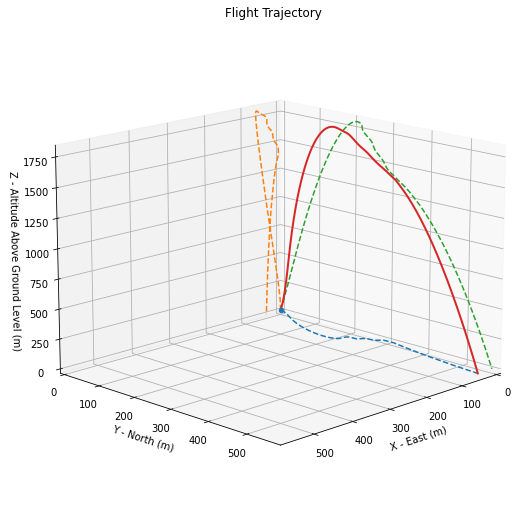



Trajectory Kinematic Plots



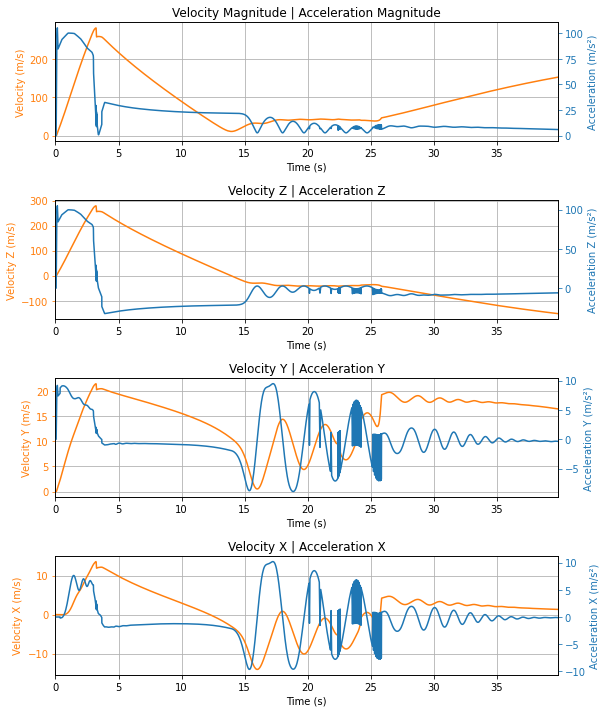



Angular Position Plots



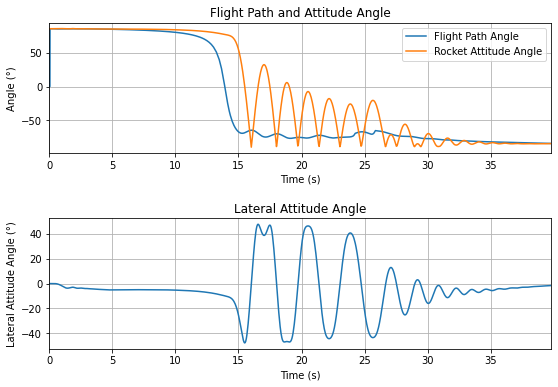



Path, Attitude and Lateral Attitude Angle plots



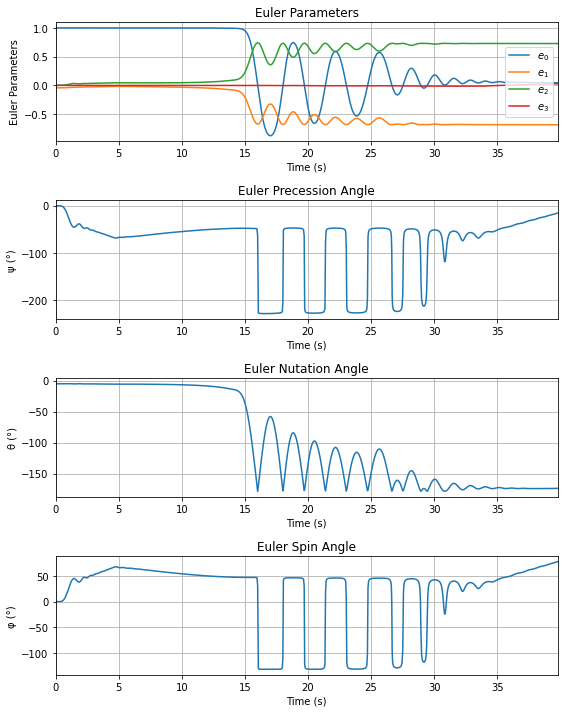



Trajectory Angular Velocity and Acceleration Plots



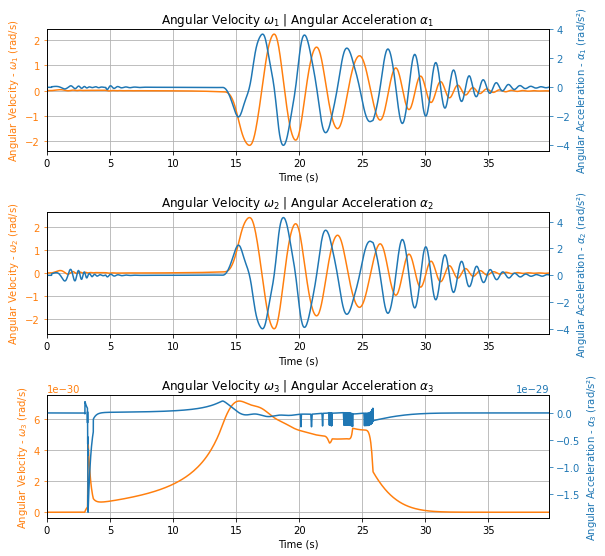



Trajectory Force Plots



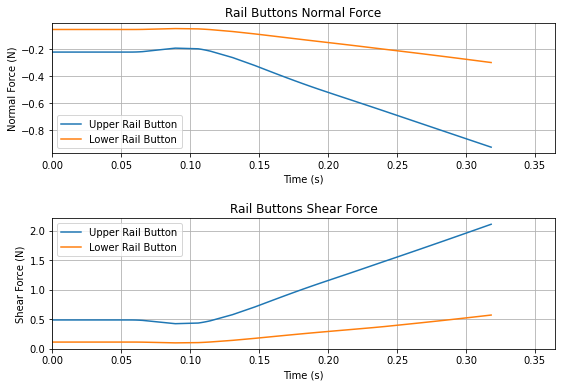

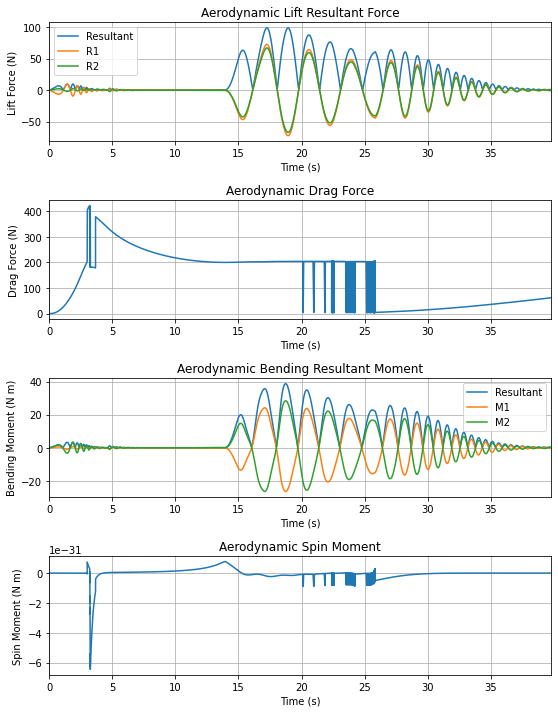



Trajectory Energy Plots



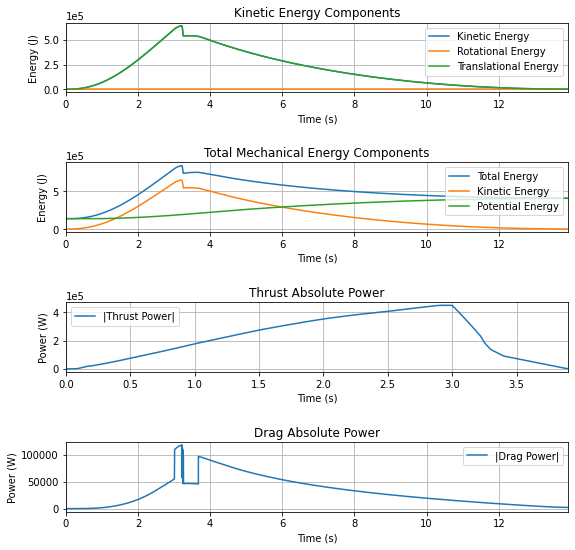



Trajectory Fluid Mechanics Plots



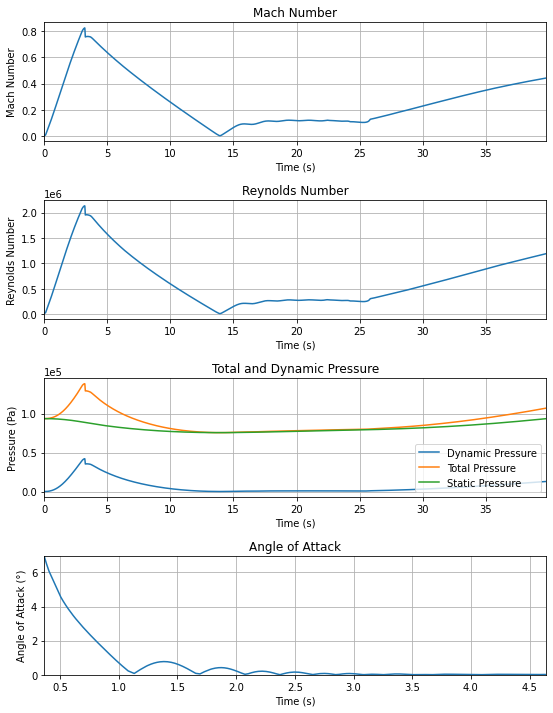



Trajectory Stability and Control Plots



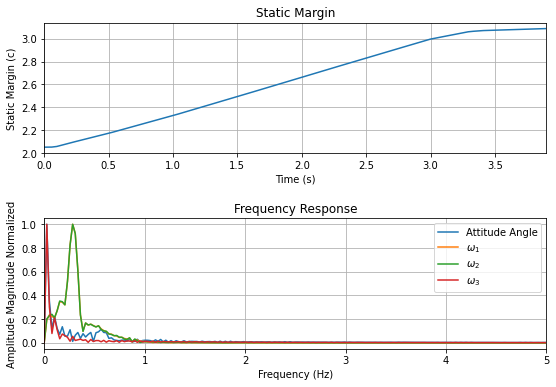

In [29]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)
TestFlight.allInfo()